In [16]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [17]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [18]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.MA.value(shrinkage_type="linear")

In [19]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [20]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [01:17<00:00,  3.64it/s]


StrategyStatistics:
* final_nav = 10.663948
* geom_avg_total_r = 0.132568
* geom_avg_xs_r = 0.124790
* std_xs_r = 0.151933
* min_xs_r = -0.091913
* max_xs_r = 0.107889
* skew = 0.052114
* kurtosis = 16.136684
* max_dd = -0.283952
* sharpe = 0.821347
* alpha_buy_hold = 0.054997
* tracking_error_buy_hold = 0.148782
* ir_buy_hold = 0.369647
* factor_loadings = {'low_risk': 0.5205461303933543, 'momentum': -0.0385539636844059, 'quality': 0.12156763661149367, 'size': 0.05508802446108636, 'value': -0.21175196917654832, 'spx': 0.7286055920801616}
* alpha_benchmark = 0.055638
* alpha_benchmark_pvalue = 0.010221
* tracking_error_benchmark = 0.092402
* ir_benchmark = 0.602133
* ttest_pval = 0.263958
* levene_pval = 0.000000
* timing_ability_coef = -0.023584
* timing_ability_pval = 0.161270

In [21]:
result.std_xs_r, result.sharpe

(0.15193307311490528, 0.8213472976170348)

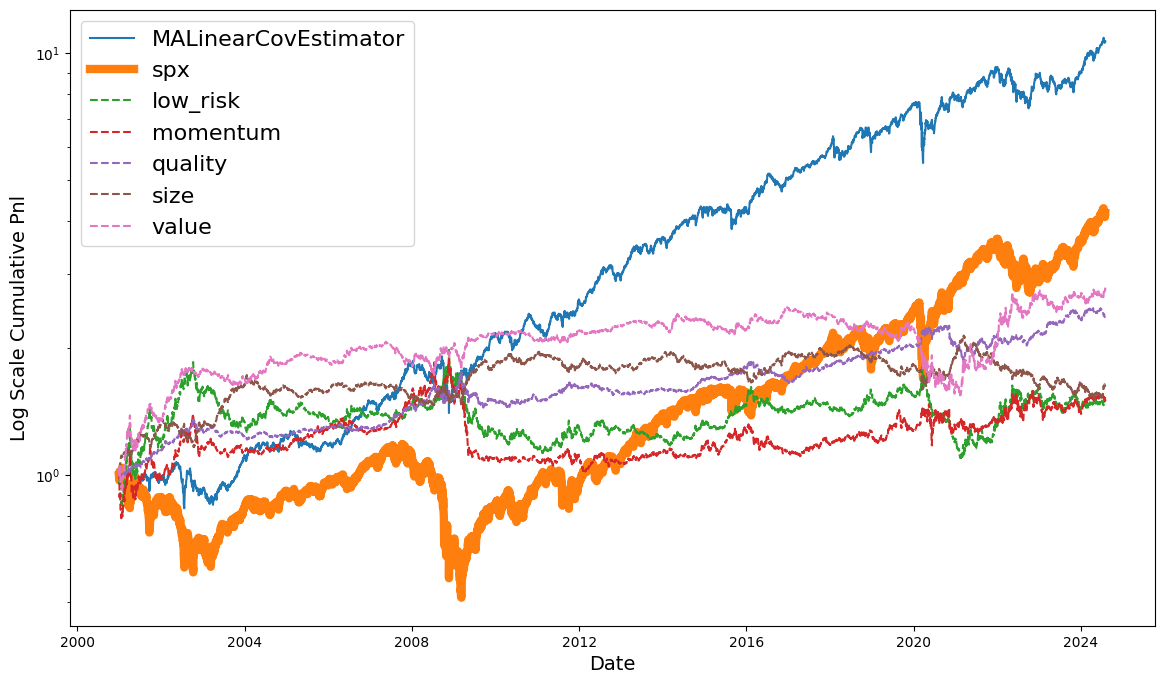

In [22]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

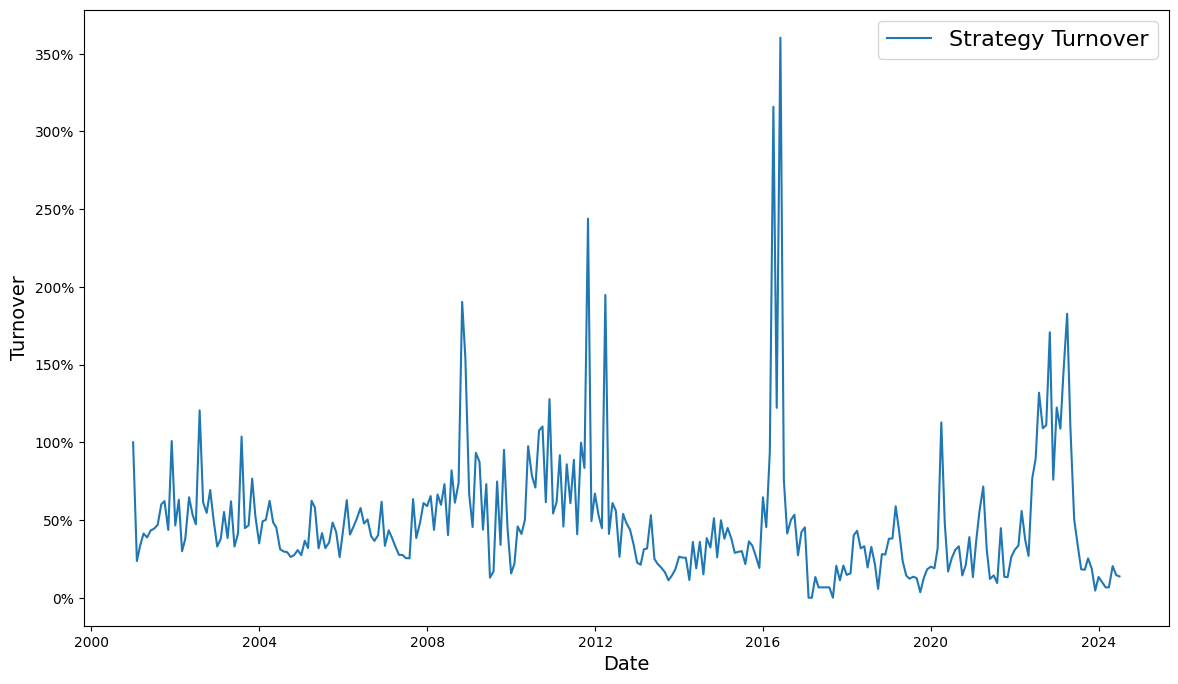

In [23]:
runner.plot_turnover()

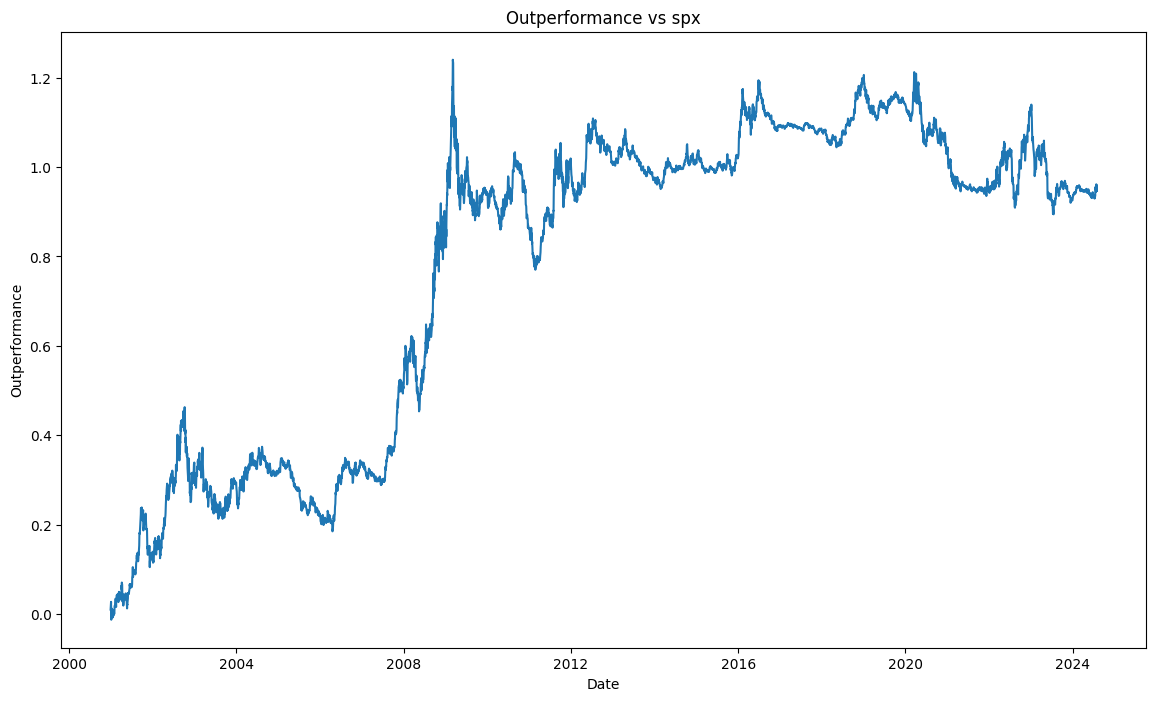

In [24]:
runner.plot_outperformance(mkt_only=True)

In [25]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")